In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import metrics as met
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import f1_score


In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [3]:

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

# Load dataset
df = pd.read_csv('q1_survey_dataset.csv')
#df = pd.read_csv('unbalanced.csv')
# Load images and labels
image_paths = df['image_path'].values
labels = df['q1'].values





In [4]:
# Preprocess images
images = []
for path in image_paths:
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)   
    try:
      image = cv2.resize(image, (28, 28))
      image = image.reshape((28, 28, 1))
    except Exception as e:
      print(path)
      print(e)
      print(image)   
    images.append(image)


images = np.array(images)
nan_values = np.argwhere(np.isnan(labels))
# Remove the rows containing NaN values from both the images and labels arrays
images = np.delete(images, nan_values, axis=0)
labels = np.delete(labels, nan_values, axis=0)
labels = to_categorical(labels - 1)  # Convert labels to one-hot encoding

# Split dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.3, random_state=42,stratify=labels)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.3, random_state=42,stratify=train_labels)

# Define model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(7, activation='softmax'))



# Compile model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy',met.Precision(), met.Recall()])

# Train model
model.fit(train_images, train_labels, epochs=30, batch_size=16, validation_data=(val_images, val_labels))



Epoch 1/30
112/112 [==============================] - 6s 38ms/step - loss: 4.0726 - accuracy: 0.2438 - precision: 0.2964 - recall: 0.0826 - val_loss: 1.8264 - val_accuracy: 0.3132 - val_precision: 0.5346 - val_recall: 0.1114
Epoch 2/30
112/112 [==============================] - 2s 21ms/step - loss: 1.3484 - accuracy: 0.5230 - precision: 0.6774 - recall: 0.3787 - val_loss: 1.0502 - val_accuracy: 0.5990 - val_precision: 0.7697 - val_recall: 0.5125
Epoch 3/30
112/112 [==============================] - 2s 21ms/step - loss: 0.9814 - accuracy: 0.6584 - precision: 0.7832 - recall: 0.5461 - val_loss: 1.0036 - val_accuracy: 0.6553 - val_precision: 0.7141 - val_recall: 0.5858
Epoch 4/30
112/112 [==============================] - 2s 21ms/step - loss: 0.8092 - accuracy: 0.7303 - precision: 0.8105 - recall: 0.6511 - val_loss: 0.7661 - val_accuracy: 0.7654 - val_precision: 0.8326 - val_recall: 0.7104
Epoch 5/30
112/112 [==============================] - 2s 21ms/step - loss: 0.6306 - accuracy: 0.7719

35/35 [==============================] - 0s 10ms/step - loss: 0.8810 - accuracy: 0.8982 - precision: 0.9006 - recall: 0.8972
Test accuracy: 0.8981651663780212
Test Precision: 0.90055251121521
Test recall: 0.8972477316856384
35/35 [==============================] - 0s 9ms/step
Confusion Matrix:


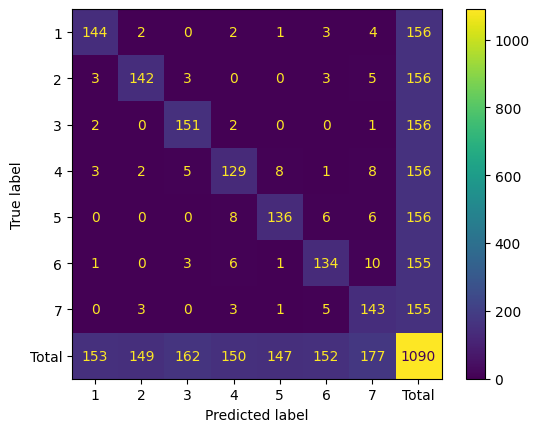

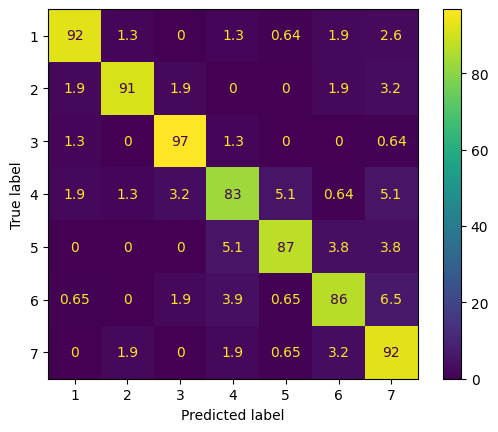

Confusion Matrix with percentages column-wise:


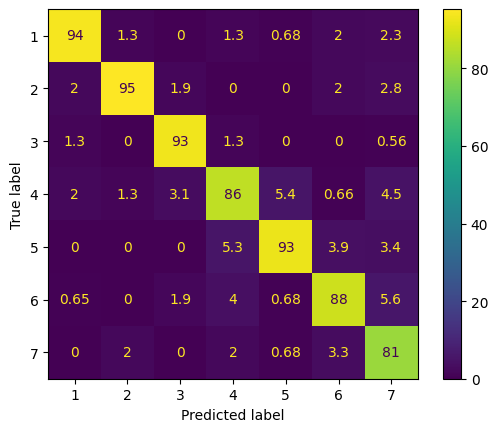

Classification Report:
              precision    recall  f1-score   support

     Class 1       0.94      0.92      0.93       156
     Class 2       0.95      0.91      0.93       156
     Class 3       0.93      0.97      0.95       156
     Class 4       0.86      0.83      0.84       156
     Class 5       0.93      0.87      0.90       156
     Class 6       0.88      0.86      0.87       155
     Class 7       0.81      0.92      0.86       155

    accuracy                           0.90      1090
   macro avg       0.90      0.90      0.90      1090
weighted avg       0.90      0.90      0.90      1090



In [5]:


# Evaluate model

test_loss, test_acc,test_prec,test_recall = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print('Test Precision:', test_prec)
print('Test recall:',test_recall)
#print('Test f1 score:',test_f1)
y_pred_prob = model.predict(test_images)

# Get predicted class labels by finding the class with the highest probability
y_pred = np.argmax(y_pred_prob, axis=1)

# Create confusion matrix
cm = metrics.confusion_matrix(test_labels.argmax(axis=1), y_pred)
# Calculate the row and column totals
row_totals = np.sum(cm, axis=1)
col_totals = np.sum(cm, axis=0)
total_samples = np.sum(row_totals)

# Add the row and column totals to the confusion matrix
cm_with_totals = np.zeros((cm.shape[0]+1, cm.shape[1]+1), dtype=np.int64)
cm_with_totals[:-1, :-1] = cm
cm_with_totals[:-1, -1] = row_totals
cm_with_totals[-1, :-1] = col_totals
cm_with_totals[-1, -1] = total_samples

cm_percentages_row = cm.astype('float') / row_totals[:, np.newaxis] * 100
cm_percentages_col = cm.astype('float') / col_totals * 100

# Print the confusion matrix
print("Confusion Matrix:")
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_with_totals,display_labels=[1,2,3,4,5,6,7,'Total'])
disp.plot(include_values=True)
plt.show()

cm_precent = cm.astype('float')*100 / cm.sum(axis=1)[:, np.newaxis]


#print("Confusion Matrix with percentages row-wise:")
disp_row = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_percentages_row, display_labels=[1, 2, 3, 4, 5, 6, 7])
disp_row.plot(include_values=True)
plt.show()

# Print the confusion matrix with percentages column-wise
print("Confusion Matrix with percentages column-wise:")
disp_col = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_percentages_col, display_labels=[1, 2, 3, 4, 5, 6, 7])
disp_col.plot(include_values=True)
plt.show()

target_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7']
classification_rep = metrics.classification_report(test_labels.argmax(axis=1), y_pred, target_names=target_names)
print("Classification Report:")
print(classification_rep)